<a href="https://colab.research.google.com/github/PLEX-GR00T/Cart_Pole_LQR/blob/main/ai_hw2_q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 3:

For this question, we will use numpy

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

Now let's declare the constants from the problem statement

In [ ]:
M = 1
m = 0.3
b = 0.1
l = 1
I = 0.001
g = 9.8

dt = 0.01
N = 500

Using the above values, we can compute $T_{a}$ and $T_{s}$. Also $R_{a} = -2$ 

In [ ]:
Ta = np.array([0, (I + m*l**2)/(I*(M+m) + M*m*l**2), 0,
               (m*l)/(I*(M+m) + M*m*l**2)])

Ts = np.eye(4) + np.array([
        [0, 1, 0, 0],
        [0, -(I + m*l**2)*b/(I*(M+m) + M*m*l**2),
         (m**2*g*l**2)/(I*(M+m) + M*m*l**2), 0],
        [0, 0, 0, 1],
        [0, -(m*l*b)/(I*(M+m) + M*m*l**2),
         m*g*l*(M+m)/(I*(M+m) + M*m*l**2), 0]]) * dt

Ra = -2

From the question statement, we can denote $\rho$ and $\sigma$ as follows:

In [ ]:
rho = [10, 100]
sigma = [0.01, 1]

Since the value of $R_s$ is dependent on $\rho$, we will be using the following function to calculate the value of $R_s$

In [ ]:
def Rs_calc(rho):
    return -np.array([[rho/20, 0, 0, 0],
                      [0, rho/20, 0, 0],
                      [0, 0, rho, 0],
                      [0, 0, 0, rho/10]])


We can now define the function which we will be using to calculate the force and optimal policy, as per the slides.

In [ ]:
def lqr(rho, sigma, Ts, Ta, s, N):
    Rs = Rs_calc(rho)
    Sigma = sigma * np.eye(4)
    V = Rs
    q = 0
    for k in range(N, 0, -1):
        oldV = V
        V = Rs + (Ts.T @ oldV.T @ Ts) - ((Ta.T @ oldV @ Ts).T) * ((Ra + Ta.T @ oldV @ Ta)**(-1)) @ (Ta.T @ oldV @ Ts)
        q = q + np.trace(Sigma @ oldV)

    ret_f = []
    ret_s = []
    for k in range(N):
        L = ((Ra + Ta.T @ V @ Ta)**(-1)) * (Ta.T @ V @ Ts)
        F = -L @ s
        s = Ts @ s + Ta * F * dt + np.random.normal(0, sigma, 1)
        ret_f.append(F)
        ret_s.append(s)
    return L, ret_f, ret_s, V, q


#### A. Plot position ($x$), angle ($\phi$) and force ($\pi$*) vs time in the following ranges:

$x \in \{-0.5, 0.5\}$ m,

$x' \in \{-0.5, 0.5\}$ m/s,

$\phi \in \{-5, 5\}$ rad,

$\phi' \in \{-5, 5\}$ rad/s

We will be using this function to call our code with different values of $\rho$ and $\sigma$:

In [ ]:
def solve_a_ranges(rho, sigma):

    s = np.array([0.1, -0.05, 7, 0.1])
    L, F, S, V, q = lqr(rho, sigma, Ts, Ta, s, N)
    
    # Plot x, phi and F v/s time
    time = [dt*i for i in range(1, 501)]
    
    fig, ax = plt.subplots(1, 3)
    for i in range(N):
        if -0.5 <= S[i][0] <= 0.5:
            ax[0].scatter(time[i], S[i][0], color = 'black')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('position (x)')
    ax[0].title.set_text('position - time graph')

    for i in range(N):
        if -5 <= S[i][2] <= 5:
            ax[1].scatter(time[i], S[i][2], color = 'black')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('angle (phi)')
    ax[1].title.set_text('angle - time graph')

    for i in range(N):
        if (-0.5 <= S[i][0] <= 0.5 and -5 <= S[i][1] <= 5 
            and -5 <= S[i][2] <= 5 and -5 <= S[i][3] <= 5):
            ax[2].scatter(time[i], F[i], color = 'black')
    ax[2].set_xlabel('time')
    ax[2].set_ylabel('force (F)')
    ax[2].title.set_text('force - time graph')

    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma))
    fig.set_size_inches(15, 5)

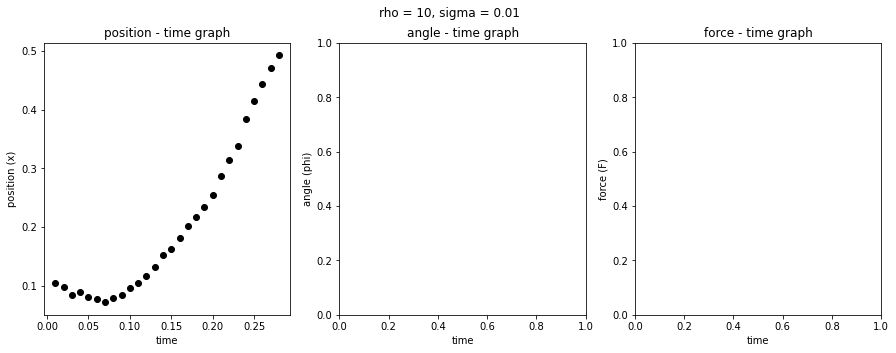

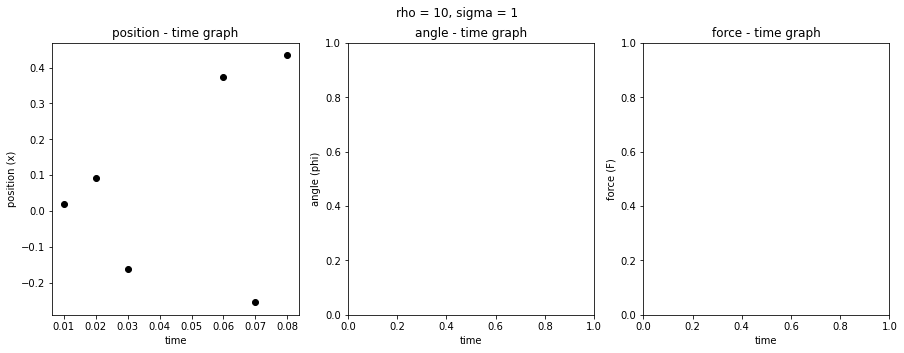

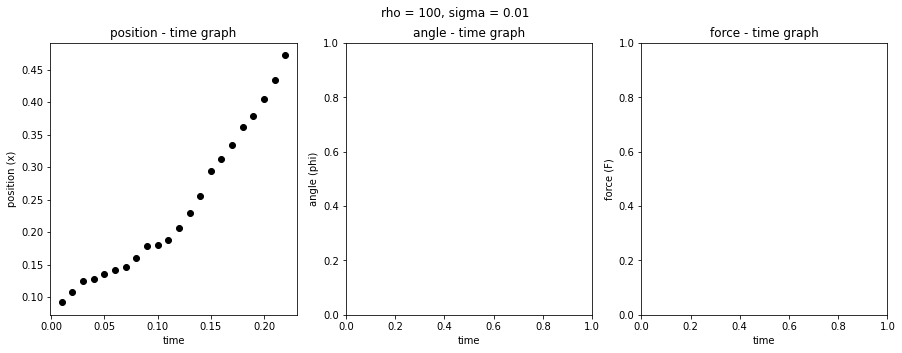

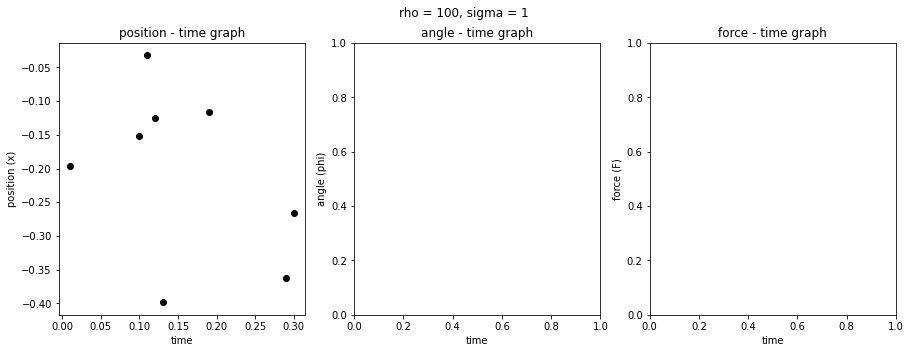

In [ ]:
for r in rho:
    for s in sigma:
        solve_a_ranges(r, s)

If we ignore the ranges, we get the following plots:

In [ ]:
def solve_a_no_ranges(rho, sigma):

    s = np.array([0.1, -0.05, 7, 0.1])
    L, F, S, V, q = lqr(rho, sigma, Ts, Ta, s, N)
    
    # Plot x, phi and F v/s time
    time = [dt*i for i in range(1, 501)]
    
    fig, ax = plt.subplots(1, 3)
    for i in range(N):
        ax[0].scatter(time[i], S[i][0], color = 'black')
    ax[0].set_xlabel('time')
    ax[0].set_ylabel('position (x)')
    ax[0].title.set_text('position - time graph')

    for i in range(N):
        ax[1].scatter(time[i], S[i][2], color = 'black')
    ax[1].set_xlabel('time')
    ax[1].set_ylabel('angle (phi)')
    ax[1].title.set_text('angle - time graph')

    for i in range(N):
        ax[2].scatter(time[i], F[i], color = 'black')
    ax[2].set_xlabel('time')
    ax[2].set_ylabel('force (F)')
    ax[2].title.set_text('force - time graph')

    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma))
    fig.set_size_inches(15, 5)

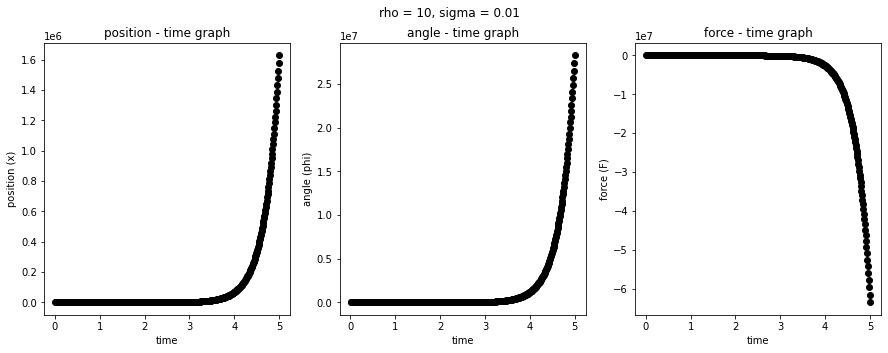

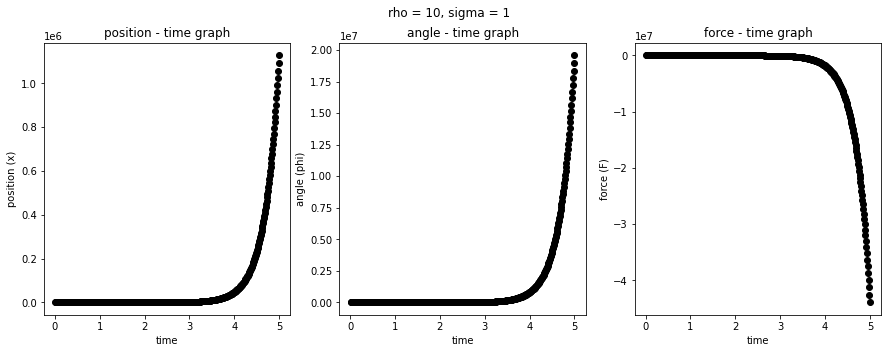

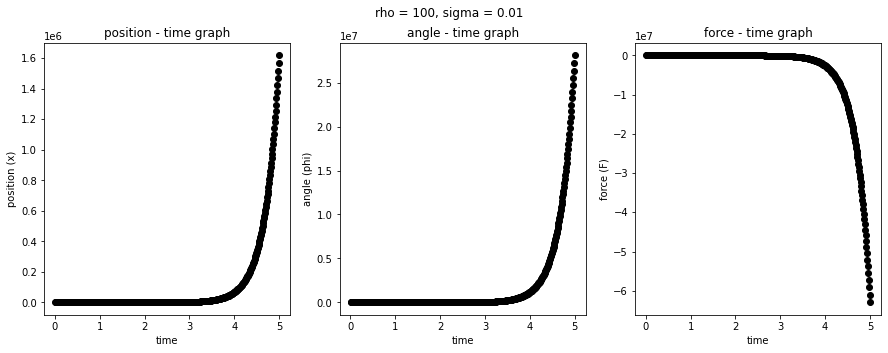

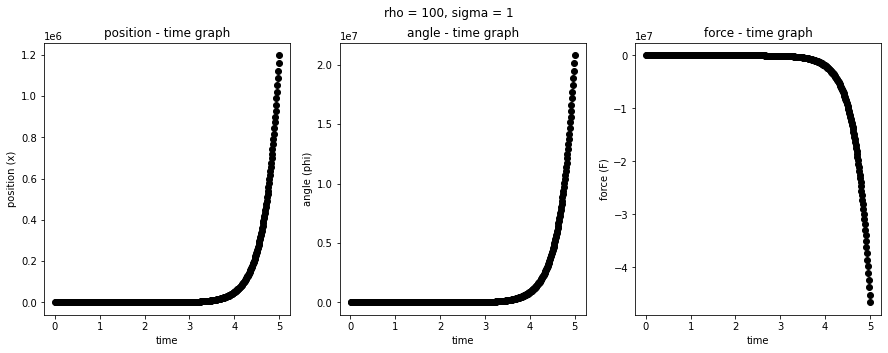

In [ ]:
for r in rho:
    for s in sigma:
        solve_a_no_ranges(r, s)

#### B. Plot $x$ vs $x'$ and $\phi$ vs $\phi'$ in same ranges as above.

In [ ]:
def solve_b(rho, sigma):
    s = np.array([0.1, -0.05, 7, 0.1])
    L, F, S, V, q = lqr(rho, sigma, Ts, Ta, s, N)
    
    time = [dt*i for i in range(1, 501)]
    
    fig, ax = plt.subplots(1, 2)
    for i in range(N):
        if -0.5 <= S[i][0] <= 0.5 and -5 <= S[i][1] <= 5:
            ax[0].scatter(S[i][0], S[i][1], color = 'black')
    ax[0].set_xlabel('position')
    ax[0].set_ylabel('velocity')
    ax[0].title.set_text('velocity - position graph')

    for i in range(N):
        if -5 <= S[i][2] <= 5 and -5 <= S[i][3] <= 5:
            ax[1].scatter(S[i][2], S[i][3], color = 'black')
    ax[1].set_xlabel('angle')
    ax[1].set_ylabel('angular velocity')
    ax[1].title.set_text('angular velocity - angle graph')


    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma))
    fig.set_size_inches(10, 5)

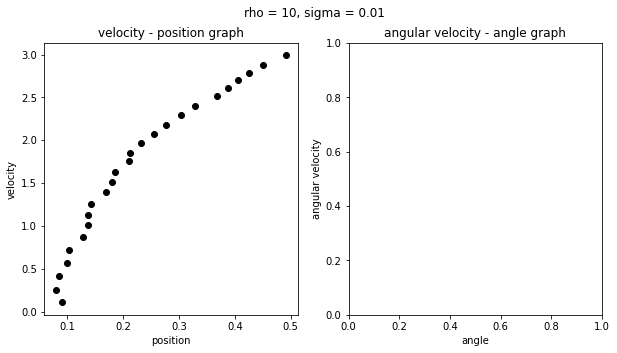

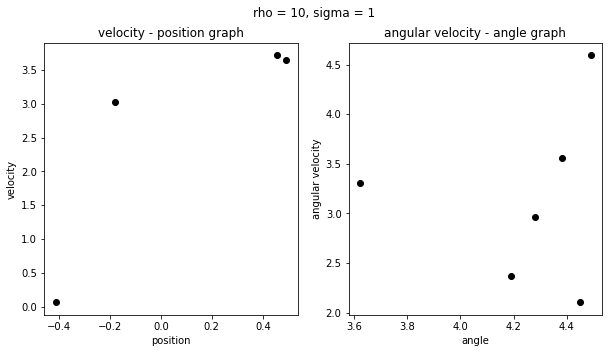

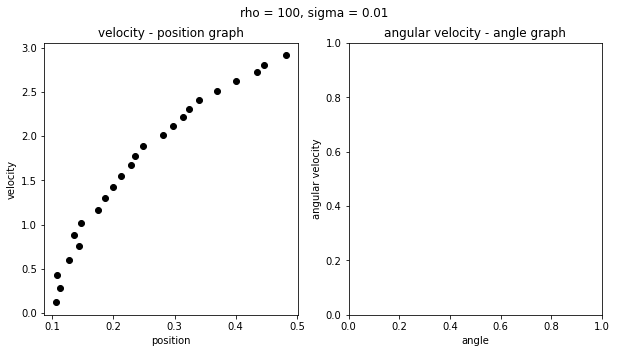

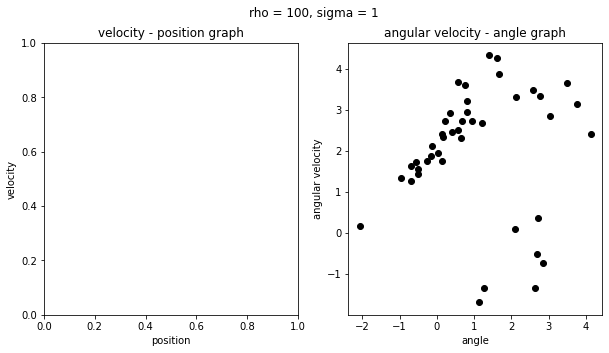

In [ ]:
for r in rho:
    for s in sigma:
        solve_b(r, s)

Again, if we ignore the above ranges:

In [ ]:
def solve_b_no_range(rho, sigma):
    s = np.array([0.1, -0.05, 7, 0.1])
    L, F, S, V, q = lqr(rho, sigma, Ts, Ta, s, N)
    
    time = [dt*i for i in range(1, 501)]
    
    fig, ax = plt.subplots(1, 2)
    for i in range(N):
        ax[0].scatter(S[i][0], S[i][1], color = 'black')
    ax[0].set_xlabel('position')
    ax[0].set_ylabel('velocity')
    ax[0].title.set_text('velocity - position graph')

    for i in range(N):
        ax[1].scatter(S[i][2], S[i][3], color = 'black')
    ax[1].set_xlabel('angle')
    ax[1].set_ylabel('angular velocity')
    ax[1].title.set_text('angular velocity - angle graph')


    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma))
    fig.set_size_inches(10, 5)

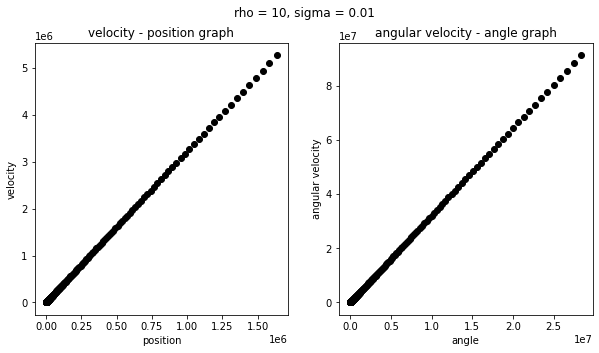

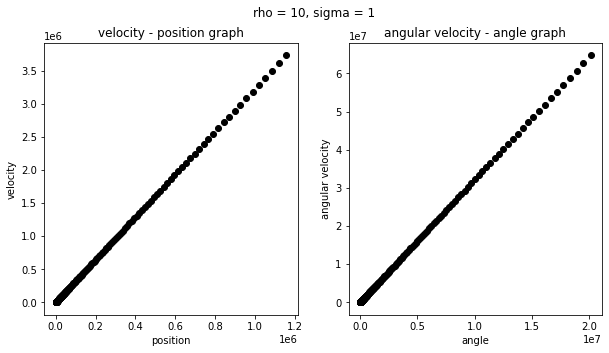

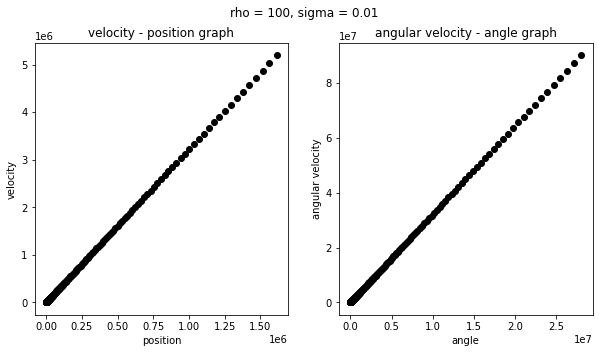

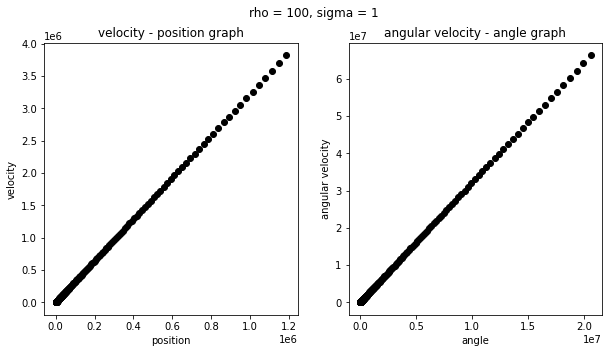

In [ ]:
for r in rho:
    for s in sigma:
        solve_b_no_range(r, s)

#### C. Plot optimal value $U(s) = s^TV_{0}^*s + q_0$ for $s = [0,0,\phi, \phi']$ and corresponding optimal trajectory $\phi'$ vs $\phi$ for the above ranges

In [ ]:
def solve_c(rho, sigma):
    s = np.array([0.1, -0.05, 7, 0.1])
    L, F, S, V, q = lqr(rho, sigma, Ts, Ta, s, N)
    
    S = np.array(S) # dimension 500 x 4
    U = []
    for s in S:
        U.append(s.T @ V @ s + q)
    
    fig, ax = plt.subplots(1)

    for i in range(N):
        if -5 <= S[i][2] <= 5:
            ax.scatter(S[i][2], U[i], color = 'black')
    ax.set_xlabel('angle')
    ax.set_ylabel('U')

    for i in range(N):
        if -5 <= S[i][3] <= 5:
            ax.scatter(S[i][3], U[i], color = 'black')
    ax.set_xlabel('angular velocity')
    ax.set_ylabel('U')

    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma))

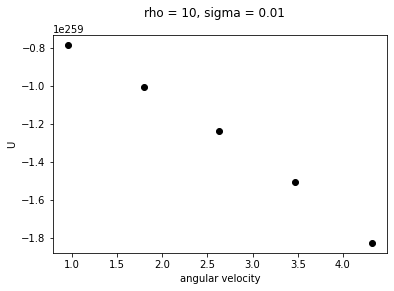

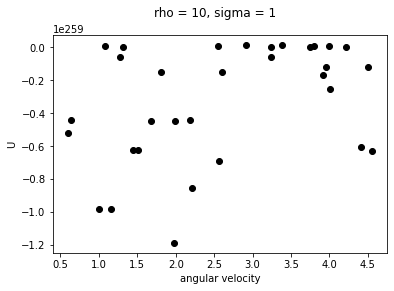

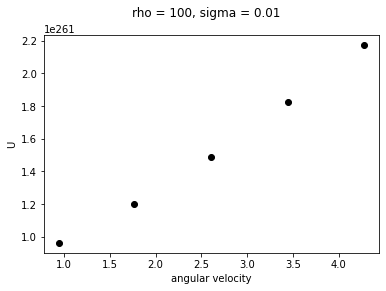

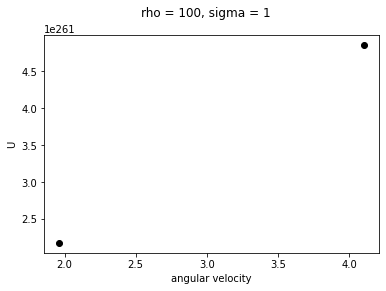

In [ ]:
for r in rho:
    for s in sigma:
        solve_c(r, s)

If we set x and x' as 0 and then calculate the cost:

In [ ]:
def solve_c_set_zeros(rho, sigma):
    s = np.array([0.1, -0.05, 7, 0.1])
    L, F, S, V, q = lqr(rho, sigma, Ts, Ta, s, N)
    
    S = np.array(S) # dimension 500 x 4

    S[: 0] = 0
    S[: 1] = 0

    U = []
    for s in S:
        U.append(s.T @ V @ s + q)
    
    fig, ax = plt.subplots(1)

    for i in range(N):
        if -5 <= S[i][2] <= 5:
            ax.scatter(S[i][2], U[i], color = 'black')
    ax.set_xlabel('angle')
    ax.set_ylabel('U')

    for i in range(N):
        if -5 <= S[i][3] <= 5:
            ax.scatter(S[i][3], U[i], color = 'black')
    ax.set_xlabel('angular velocity')
    ax.set_ylabel('U')

    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma))

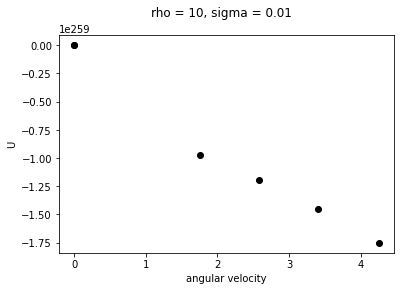

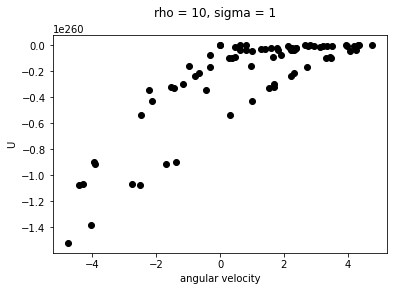

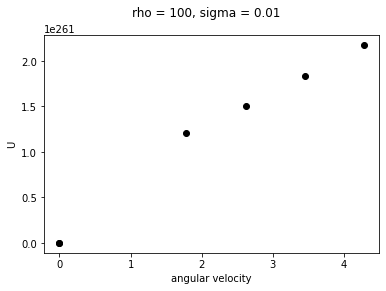

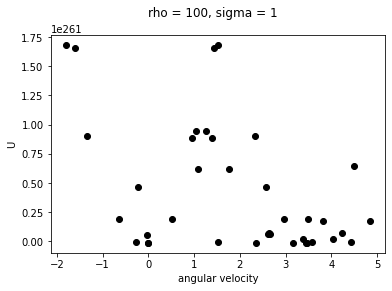

In [ ]:
for r in rho:
    for s in sigma:
        solve_c_set_zeros(r, s)

If we calculate the lqr with $s_0 = [0, 0, 7, 0.1]$ (x and x' set to 0 in $s_0$),

In [ ]:
def solve_c_new_s0(rho, sigma):
    s = np.array([0, 0, 7, 0.1])
    L, F, S, V, q = lqr(rho, sigma, Ts, Ta, s, N)
    
    S = np.array(S) # dimension 500 x 4

    S[: 0] = 0
    S[: 1] = 0

    U = []
    for s in S:
        U.append(s.T @ V @ s + q)
    
    fig, ax = plt.subplots(1)

    for i in range(N):
        if -5 <= S[i][2] <= 5:
            ax.scatter(S[i][2], U[i], color = 'black')
    ax.set_xlabel('angle')
    ax.set_ylabel('U')

    for i in range(N):
        if -5 <= S[i][3] <= 5:
            ax.scatter(S[i][3], U[i], color = 'black')
    ax.set_xlabel('angular velocity')
    ax.set_ylabel('U')

    fig.suptitle('rho = {}, sigma = {}'.format(rho, sigma))

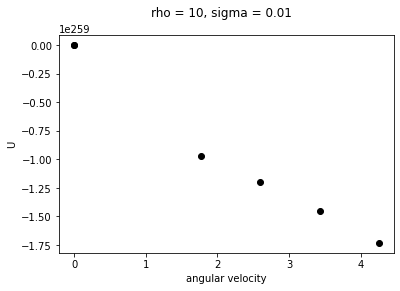

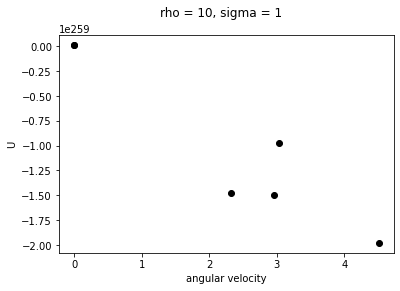

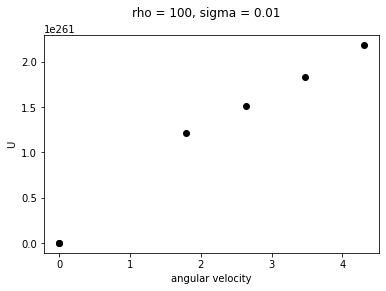

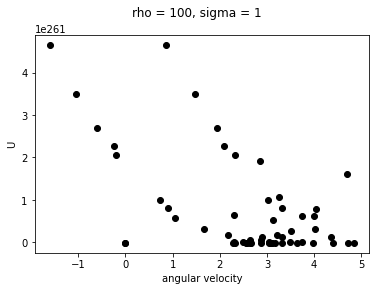

In [ ]:
for r in rho:
    for s in sigma:
        solve_c_new_s0(r, s)

In general we see that as the value of $\sigma$ increases, the noise in the model increases. When we increase the value of $\rho$, we can see that the values of $s$ vary a lot, which signifies more exploration.